# [Introduction to Data Science](http://datascience-intro.github.io/1MS041-2024/)    
## 1MS041, 2024 
&copy;2024 Raazesh Sainudiin, Benny Avelin. [Attribution 4.0 International     (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

# Joint and Marginal Distribution

f(X,Y) = Joint Density Function
F(X,Y) = $\int\int f(X,Y) dy dx$

Marginal Probability Distribution

> Integrate/Sum only on one axis (dx OR dy), depending on which variable you wish to calculate the marginal probability for.

## Expected Value, Variance

$$
E[X] = \Sigma xp(x) \\
Var[X] = E[(X-\mu)^2] = E[X^2] - \mu^2 \\
E[X^2] = \Sigma x^2p(x) \\ \\
$$

$$
P(X=x) = f(x) (PDF) \\
P(X<x) = \Sigma f(x) or \int f(x)dx (CDF)
$$

## Second notebook on Random variables

Lets take a look again at the spam dataset and look at our concepts there

In [7]:
from Utils import load_sms
sms_data = load_sms()
sms_data[:2]

[('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
  0),
 ('Ok lar... Joking wif u oni...', 0)]

Let X represents each SMS text (an entry in the list), and let $Y$ represent whether text is spam or not i.e. $Y \in \{0,1\}$. Thus $\mathbb{P}(Y = 1)$ is the probability that we get a spam. The goal is to estimate:
$$
    \mathbb{P}(Y = 1 | \text{"free" or "prize" is in } X) \enspace .
$$
That is, the probability that the SMS is spam given that "free" or "prize" occurs in the SMS. 
Hint: it is good to remove the upper/lower case of words so that we can also find "Free" and "Prize"; this can be done with `text.lower()` if `text` a string.

To do this we can create a new random variable $Z$ which is $1$ if "free" or "prize" appears in $X$.

In [8]:
interesting_words=set(['free','prize'])
TF10 = {True: 1, False: 0}
Z_obs = [TF10[not interesting_words.isdisjoint([word.lower() for word in line[0].split(' ')])] for line in sms_data]

In [10]:
Z_obs[:10] # of the first 10 messages, how many contain the word 'free' or 'prize'?

[0, 0, 1, 0, 0, 0, 0, 0, 1, 1]

In [11]:
Y_obs = [y for x,y in sms_data] # extract the labels
Y_obs[:10] # of the first 10 messages, how many are spam?

[0, 0, 1, 0, 0, 1, 0, 0, 1, 1]

In [13]:
import numpy as np 
def F_X_12(x):
    TF10 = {True: 1, False: 0}
    # adds up the number of times the word 'free' or 'prize' appears in the message
    return np.mean([TF10[(y <= x[0]) and (z <= x[1])] for y,z in zip (Y_obs,Z_obs)]) 

In [14]:
F_X_12([1,0])

np.float64(0.9551328068916008)

This is the JDF for this problem

In [15]:
print("\tz <= 0 \t\tz <= 1")
for x1 in range(0,2):
    print("y <= %d \t" % x1,end='')
    for x2 in range(0,2):
        print("%.2f" % (F_X_12((x1,x2))),end='\t\t')
    print('\n')

	z <= 0 		z <= 1
y <= 0 	0.86		0.87		

y <= 1 	0.96		1.00		



In [16]:
F_X_12((1,0))

np.float64(0.9551328068916008)

In [17]:
F_X_12((0,0)) == F_X_12((0,1))*F_X_12((1,0))

np.False_

In [18]:
F_X_12((0,1))*F_X_12((1,0))

np.float64(0.8270846721557743)

In [19]:
# Are they independent? If so, then the JDF is just the product of the 
# DFs for Y and Z, but
0.865936826992103*0.955132806891601

0.827084672155774

Which is not 0.858, so they are not independent. So lets try to estimate the probability that $Y=1$ given that $Z = 1$. Lets again do that by filtering

In [ ]:
np.mean([y for z,y in zip(Z_obs,Y_obs) if z == 1])

Compare that with the marginal probability of $Y = 1$, which is according to our JDF 1-0.866 = 0.134

In [ ]:
# Or we can just compute it directly
np.mean(Y_obs)

What we see from this is that knowing that the words "free" or "prize" appeared in the sms text, we are much more certain that it is a spam. We also see that looking directly at the JDF this can be hard to see, although it is equivalent.

In [17]:
x = np.random.normal(size=100)

In [18]:
np.mean(x)

-0.08265975892373005

In [19]:
g = lambda x: x**2

In [23]:
mean = np.mean(x)
y = x-mean
np.mean(y**4)

3.588674726116084

## Moments etc

In [20]:
import numpy as np
x = np.random.normal(size=100)

In [21]:
x

array([-1.75352237, -0.29444232,  0.10930177, -0.48267021,  1.33082724,
        1.72638852,  0.24654428, -0.42388161, -0.36556683, -0.2701849 ,
        1.42850159,  0.81289119, -0.15243188,  2.05141212, -0.12351252,
        0.16228026,  0.29029926, -0.51162249,  0.1769495 , -0.50505062,
       -0.79625339,  0.03451092, -0.61272092,  1.50553008, -0.45411172,
        0.16318282, -0.36197575, -0.55172022,  1.79390766,  0.17341116,
        0.07637391,  0.04115703,  0.13163649, -0.07999922,  0.04170978,
       -1.43113973, -0.55561929, -0.77561795, -0.06638311, -0.57517488,
        0.2474049 , -0.53607634,  0.59237962, -2.1593221 , -0.10478908,
       -0.07864668,  0.35583987, -0.5926692 ,  1.31281786, -0.17612447,
       -0.46189814, -1.17689077, -0.6415513 ,  0.69382058, -2.14142411,
       -0.38168897, -0.03621312, -0.91810272,  2.29760411, -1.78477258,
       -0.5202711 , -1.09839334,  0.30016258, -0.76496769,  0.96514613,
       -1.03714844,  1.77827762,  0.54013312,  0.64401098, -0.58

## Sample mean

In [22]:
np.mean(x)

np.float64(-0.08055170545962964)

## Sample variance

In [23]:
np.var(x)

np.float64(0.9696895674247559)

Or by doing it yourself

In [25]:
mu = np.mean(x)
np.mean(np.power(x-mu,2)) # square of the difference from the mean

np.float64(0.9696895674247559)

Higher moments, we can use `scipy`

In [26]:
from scipy.stats import skew, kurtosis

In [27]:
skew(x)

np.float64(0.3426374542174529)

In [28]:
kurtosis(x,fisher=False)

np.float64(2.949534703861673)

## Moments and tail behavior

In [29]:
def standardize(data):
    mean = np.mean(data)
    std = np.sqrt(np.var(data))
    return (data-mean)/std

(-3.0, 5.0)

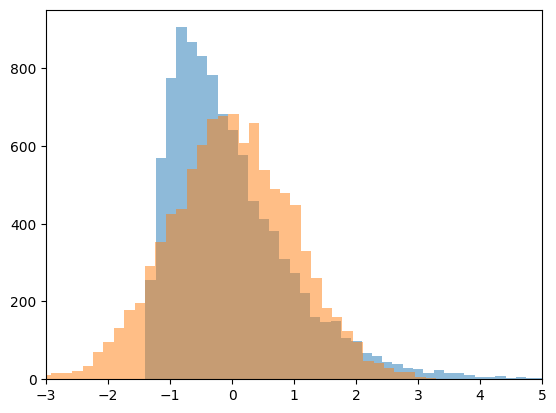

In [30]:
import numpy as np
chi2 = np.random.chisquare(4,size=10000)
normal = np.random.normal(size=10000)
import matplotlib.pyplot as plt
_=plt.hist(standardize(chi2),bins=50,alpha=0.5)
_=plt.hist(standardize(normal),bins=50,alpha=0.5)
plt.xlim(-3,5)

In [31]:
from scipy.stats import skew, kurtosis
def print_basic_stats(data):
    print("mean: %.2f\tstd: %.2f\tskew: %.2f\tkurtosis: %.2f" % (np.mean(data),np.std(data),skew(data),kurtosis(data,fisher=False)))

In [32]:
print_basic_stats(standardize(normal))

mean: 0.00	std: 1.00	skew: -0.01	kurtosis: 3.04


In [30]:
print_basic_stats(standardize(chi2))

mean: 0.00	std: 1.00	skew: 1.40	kurtosis: 5.86


In [ ]:
print_basic_stats(standardize(np.sqrt(chi2)))

In [ ]:
np.mean(np.power(standardize(chi2),3)) # Skewness

In [ ]:
np.mean(np.power(standardize(chi2),4)) # kurtosis

## Transformations of random variables

Consider a Binomial random variable

In [35]:
n = 10
p = 0.5
x = np.random.binomial(n,p,size=1000)
x

array([ 4,  3,  5,  7,  5,  5,  4,  5,  4,  7,  3,  7,  5,  8,  6,  4,  3,
        5,  1,  4,  4,  5,  6,  4,  4,  6,  2,  5,  6,  3,  6,  4,  3,  6,
        4,  5,  6,  6,  7,  4,  5,  4,  5,  5,  6,  5,  3,  7,  5,  4,  5,
        2,  6,  6,  4,  4,  2,  6,  4,  3,  4,  5,  2,  3,  4,  6,  5,  7,
        5,  5,  3,  4,  3,  6,  3,  5,  6,  9,  4,  8,  5,  6,  3,  3,  6,
        7,  3,  6,  5,  3,  3,  3,  7,  6,  8,  3,  5,  6,  6,  4,  4,  5,
        4,  5,  7,  9,  6,  6,  4,  6,  4, 10,  6,  5,  4,  3,  6,  5,  5,
        5,  5,  6,  9,  4,  4,  5,  6,  6,  6,  4,  6,  4,  6,  4,  7,  4,
        5,  6,  5,  6,  4,  3,  4,  3,  1,  5,  8,  4,  6,  5,  3,  7,  5,
        5,  2,  3,  7,  6,  6,  6,  4,  4,  5,  8,  5,  7,  9,  4,  5,  4,
        5,  7,  3,  4,  3,  2,  5,  6,  1,  6,  5,  6,  4,  2,  7,  4,  6,
        5,  6,  5,  4,  7,  5,  6,  3,  6,  5,  5,  4,  4,  6,  3,  7,  5,
        5,  7,  6,  4,  2,  4,  5,  2,  4,  8,  4,  3,  5,  5,  5,  1,  3,
        5,  6,  5,  4,  8

Lets plot the empirical density

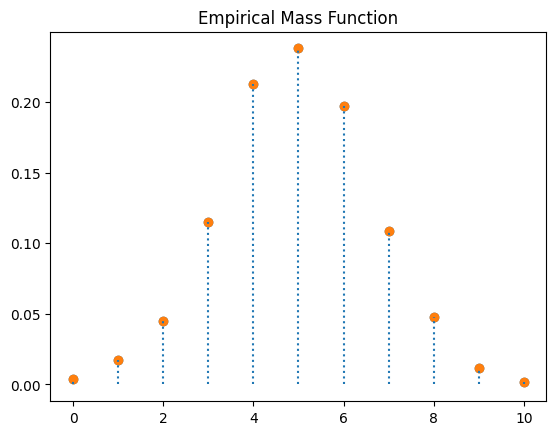

In [43]:
from Utils import makeEMF,makeEDF,plotEDF,plotEMF,emfToEdf
plotEMF(makeEMF(x))

If we had the function $g(x) = \sin(x/3)$

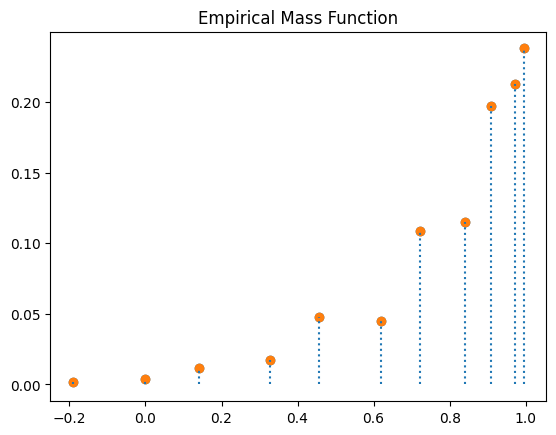

In [38]:
plotEMF(makeEMF(np.sin(x/3)))

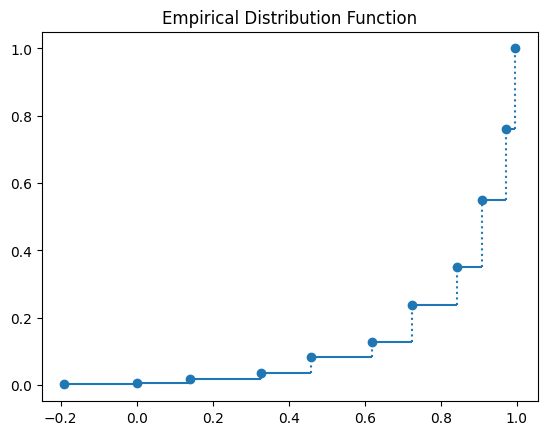

In [39]:
plotEDF(makeEDF(np.sin(x/3)))

Can we compute this thing?
What is $\sin^{[-1]}$?

Since $X$ is discrete, we can check what $\mathbb{Y}$ is, since $\mathbb{X}=\{0,1,\ldots,10\}$.

In [40]:
Y_space = np.sort(np.sin(np.arange(0,11)))
sin_inv = dict(zip(np.sin(np.arange(0,11)),np.arange(0,11)))

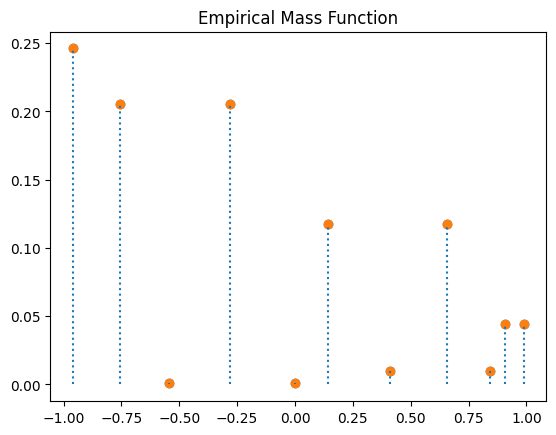

In [41]:
from scipy.special import binom as binomial
plotEMF([(y,binomial(n,sin_inv[y])*(p**sin_inv[y])*((1-p)**(n-sin_inv[y]))) for y in Y_space])

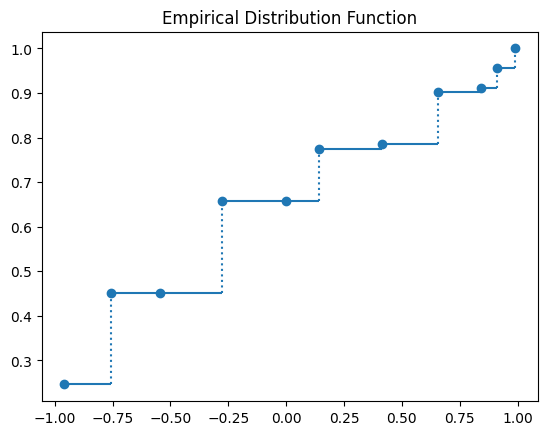

In [44]:
plotEDF(emfToEdf([(y,binomial(n,sin_inv[y])*(p**sin_inv[y])*((1-p)**(n-sin_inv[y]))) for y in Y_space]))